In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading training set
import h5py
import pandas as pd
import numpy as np
f = h5py.File('/content/drive/MyDrive/train.h5', 'r')
f2 = h5py.File('/content/drive/MyDrive/test.h5', 'r')

train = pd.DataFrame(f['train'][:], dtype=np.float64)
test = pd.DataFrame(f2['test'][:], dtype=np.float64)
print (f'Shape of training data set: {train.shape}')

all_variables = ['actualInteractionsPerCrossing',
'averageInteractionsPerCrossing',
'correctedActualMu',
'correctedAverageMu',
'correctedScaledActualMu',
'correctedScaledAverageMu',
'NvtxReco',
'p_nTracks',
'p_pt_track',
'p_eta',
'p_phi',
'p_charge',
'p_qOverP',
'p_z0',
'p_d0',
'p_sigmad0',
'p_d0Sig',
'p_EptRatio',
'p_dPOverP',
'p_z0theta',
'p_etaCluster',
'p_phiCluster',
'p_eCluster',
'p_rawEtaCluster',
'p_rawPhiCluster',
'p_rawECluster',
'p_eClusterLr0',
'p_eClusterLr1',
'p_eClusterLr2',
'p_eClusterLr3',
'p_etaClusterLr1',
'p_etaClusterLr2',
'p_phiClusterLr2',
'p_eAccCluster',
'p_f0Cluster',
'p_etaCalo',
'p_phiCalo',
'p_eTileGap3Cluster',
'p_cellIndexCluster',
'p_phiModCalo',
'p_etaModCalo',
'p_dPhiTH3',
'p_R12',
'p_fTG3',
'p_weta2',
'p_Reta',
'p_Rphi',
'p_Eratio',
'p_f1',
'p_f3',
'p_Rhad',
'p_Rhad1',
'p_deltaEta1',
'p_deltaPhiRescaled2',
'p_TRTPID',
'p_TRTTrackOccupancy',
'p_numberOfInnermostPixelHits',
'p_numberOfPixelHits',
'p_numberOfSCTHits',
'p_numberOfTRTHits',
'p_numberOfTRTXenonHits',
'p_chi2',
'p_ndof',
'p_SharedMuonTrack',
'p_E7x7_Lr2',
'p_E7x7_Lr3',
'p_E_Lr0_HiG',
'p_E_Lr0_LowG',
'p_E_Lr0_MedG',
'p_E_Lr1_HiG',
'p_E_Lr1_LowG',
'p_E_Lr1_MedG',
'p_E_Lr2_HiG',
'p_E_Lr2_LowG',
'p_E_Lr2_MedG',
'p_E_Lr3_HiG',
'p_E_Lr3_LowG',
'p_E_Lr3_MedG',
'p_ambiguityType',
'p_asy1',
'p_author',
'p_barys1',
'p_core57cellsEnergyCorrection',
'p_deltaEta0',
'p_deltaEta2',
'p_deltaEta3',
'p_deltaPhi0',
'p_deltaPhi1',
'p_deltaPhi2',
'p_deltaPhi3',
'p_deltaPhiFromLastMeasurement',
'p_deltaPhiRescaled0',
'p_deltaPhiRescaled1',
'p_deltaPhiRescaled3',
'p_e1152',
'p_e132',
'p_e235',
'p_e255',
'p_e2ts1',
'p_ecore',
'p_emins1',
'p_etconeCorrBitset',
'p_ethad',
'p_ethad1',
'p_f1core',
'p_f3core',
'p_maxEcell_energy',
'p_maxEcell_gain',
'p_maxEcell_time',
'p_maxEcell_x',
'p_maxEcell_y',
'p_maxEcell_z',
'p_nCells_Lr0_HiG',
'p_nCells_Lr0_LowG',
'p_nCells_Lr0_MedG',
'p_nCells_Lr1_HiG',
'p_nCells_Lr1_LowG',
'p_nCells_Lr1_MedG',
'p_nCells_Lr2_HiG',
'p_nCells_Lr2_LowG',
'p_nCells_Lr2_MedG',
'p_nCells_Lr3_HiG',
'p_nCells_Lr3_LowG',
'p_nCells_Lr3_MedG',
'p_pos',
'p_pos7',
'p_poscs1',
'p_poscs2',
'p_ptconeCorrBitset',
'p_ptconecoreTrackPtrCorrection',
'p_r33over37allcalo',
'p_topoetconeCorrBitset',
'p_topoetconecoreConeEnergyCorrection',
'p_topoetconecoreConeSCEnergyCorrection',
'p_weta1',
'p_widths1',
'p_widths2',
'p_wtots1',
'p_e233',
'p_e237',
'p_e277',
'p_e2tsts1',
'p_ehad1',
'p_emaxs1',
'p_fracs1',
'p_DeltaE',
'p_E3x5_Lr0',
'p_E3x5_Lr1',
'p_E3x5_Lr2',
'p_E3x5_Lr3',
'p_E5x7_Lr0',
'p_E5x7_Lr1',
'p_E5x7_Lr2',
'p_E5x7_Lr3',
'p_E7x11_Lr0',
'p_E7x11_Lr1',
'p_E7x11_Lr2',
'p_E7x11_Lr3',
'p_E7x7_Lr0',
'p_E7x7_Lr1']
scaler = MinMaxScaler()

train = train[train['Truth'] == 1]

variables = ['p_e2ts1', 'p_weta2', 'p_qOverP', 'p_pos7', 'p_deltaPhi2', 'p_DeltaE', 'p_pt_track', 'p_e2tsts1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_deltaEta2', 'p_eCluster']
X = train[all_variables]
y = train['p_truth_E']
test = test[all_variables]
#y_test = test['Truth']

print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')


Shape of training data set: (162500, 166)
Shape of X: (121495, 160)
Shape of y: (121495,)


In [ ]:
# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# LinReg
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=12)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_trainval, y_trainval, X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [ ]:
print(fs.get_feature_names_out())

['p_eCluster' 'p_rawECluster' 'p_eClusterLr2' 'p_eAccCluster' 'p_E7x7_Lr2'
 'p_e235' 'p_e255' 'p_ecore' 'p_e237' 'p_e277' 'p_E5x7_Lr2' 'p_E7x11_Lr2']


In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X_train_fs, y_trainval)

In [ ]:
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss, mean_absolute_error

preds = clf.predict(X_test_fs)
print("MAE: %.3f" % mean_absolute_error(y_test, preds))
print(preds.shape)
preds = clf.predict(test[fs.get_feature_names_out()])
print(preds.shape)

MAE: 6461.963
(24299,)
(160651,)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
with open('/content/drive/MyDrive/Regression_MagnusDiamant_SKLearnLinearRegression.txt', 'w') as file_handler:
    index = 0
    for item in preds:
        file_handler.write("{}, {}\n".format(index, item))
        index += 1

with open('/content/drive/MyDrive/Regression_MagnusDiamant_SKLearnLinearRegression_VariableList.txt', 'w') as file_handler:
    index = 0
    for item in (fs.get_feature_names_out()).tolist():
        file_handler.write("{}\n".format(item))
        index += 1

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X_train_fs, X_test_fs, fs
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
regr = MLPRegressor(random_state=123, max_iter=300).fit(X_train_fs, y_trainval)
preds = regr.predict(X_test_fs)
regr.score(X_test_fs, y_test)

0.9098760446771947

In [ ]:
preds = clf.predict(test[fs.get_feature_names_out()])
with open('/content/drive/MyDrive/Regression_MagnusDiamant_SKLearnMLPRegressor.txt', 'w') as file_handler:
    index = 0
    for item in preds:
        file_handler.write("{}, {}\n".format(index, item))
        index += 1

with open('/content/drive/MyDrive/Regression_MagnusDiamant_SKLearnMLPRegressor_VariableList.txt', 'w') as file_handler:
    index = 0
    for item in (fs.get_feature_names_out()).tolist():
        file_handler.write("{}\n".format(item))
        index += 1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# xgboost
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
### The following is only used for finding the right paramaters ###

# get a list of models to evaluate
def get_models():
    models = dict()
    trees = [10, 50, 100, 500, 1000, 5000]
    for n in trees:
        models[str(n)] = XGBClassifier(n_estimators=n, verbosity=0)
    return models


# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_brier_score', cv=cv, n_jobs=-1)
    return scores


from sklearn.linear_model import LogisticRegression


from datetime import datetime


def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# A parameter grid for XGBoost
params = {
        'n_estimators': [300],
        'eta': [0.1],
        'max_depth': [3, 4],
        }

xgb = XGBRegressor(silent=True, nthread=1)

folds = 3
param_comb = 5

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold

kf = KFold(n_splits=folds, shuffle=True, random_state=0)
variables = ['p_e2ts1', 'p_weta2', 'p_qOverP', 'p_pos7', 'p_deltaPhi2', 'p_DeltaE', 'p_pt_track', 'p_e2tsts1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_deltaEta2', 'p_eCluster']
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='neg_mean_absolute_error',  cv=kf.split(X_trainval[variables],y_trainval))


# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable

random_search.fit(X_trainval[variables], y_trainval)
timer(start_time) # timing ends here for "start_time" variable


print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,



 Time taken: 0 hours 2 minutes and 47.19 seconds.

 All results:
{'mean_fit_time': array([18.11221671, 23.29461551]), 'std_fit_time': array([0.63659548, 0.11147521]), 'mean_score_time': array([0.35567904, 0.45277341]), 'std_score_time': array([0.0031076 , 0.01007451]), 'param_n_estimators': masked_array(data=[300, 300],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 4],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_eta': masked_array(data=[0.1, 0.1],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 300, 'max_depth': 3, 'eta': 0.1}, {'n_estimators': 300, 'max_depth': 4, 'eta': 0.1}], 'split0_test_score': array([-6548.14654194, -6539.54499216]), 'split1_test_score': array([-6552.01205077, -6545.43076378]), 'split2_test_score': array([-6502.1809682 , -6487.57064437]), 'mean_test_score': array([-6534.11318

In [ ]:
# Can train model without randomizedSearch
#folds = 3
#param_comb = 5
#kf = KFold(n_splits=folds, shuffle=True, random_state=0)

#events = events.set_index('eventId')

#variables = ['p_e2ts1', 'p_weta2', 'p_qOverP', 'p_pos7', 'p_deltaPhi2', 'p_DeltaE', 'p_pt_track', 'p_e2tsts1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_deltaEta2', 'p_eCluster']
#model = XGBRegressor(max_depth=6, n_estimators=300, eta=0.1, cv=kf)
#model.fit(X_trainval[variables], y_trainval)

[16:14:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(cv=KFold(n_splits=3, random_state=0, shuffle=True), eta=0.1,
             max_depth=6, n_estimators=300)

In [ ]:
model = random_search.best_estimator_
model.fit(X_trainval[variables], y_trainval)

XGBRegressor(eta=0.1, max_depth=4, n_estimators=300, nthread=1, silent=True)

In [ ]:
pred = model.predict(X_trainval[variables])
print("Trainingset")
print("MAE: %.3f" % mean_absolute_error(y_trainval, pred))

Trainingset
MAE: 6163.517


In [ ]:
pred = model.predict(test[variables])

with open('/content/drive/MyDrive/Regression_MagnusDiamant_XGBoost.txt', 'w') as file_handler:
    index = 0
    for item in preds:
        file_handler.write("{}, {}\n".format(index, item))
        index += 1

with open('/content/drive/MyDrive/Regression_MagnusDiamant_XGBoost_VariableList.txt', 'w') as file_handler:
    index = 0
    for item in variables:
        file_handler.write("{}\n".format(item))
        index += 1

In [ ]:
# NN
X_train, X_val, y_train, y_val = train_test_split(X_trainval[variables], y_trainval, test_size=0.2, random_state=0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test[variables])
#scaler2 = StandardScaler()
#y_train = scaler.fit_transform(y_train)
#y_val = scaler.transform(y_val)
#y_test = scaler.transform(y_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)


In [ ]:
def get_class_distribution(obj):
    count_dict = {
        "rating_3": 0,
        "rating_4": 0,
        "rating_5": 0,
        "rating_6": 0,
        "rating_7": 0,
        "rating_8": 0,
    }

    for i in obj:
        if i == 3:
            count_dict['rating_3'] += 1
        elif i == 4:
            count_dict['rating_4'] += 1
        elif i == 5:
            count_dict['rating_5'] += 1
        elif i == 6:
            count_dict['rating_6'] += 1
        elif i == 7:
            count_dict['rating_7'] += 1
        elif i == 8:
            count_dict['rating_8'] += 1
        else:
            print("Check classes.")

    return count_dict

Streaming af output blev afkortet til de sidste 5000 linjer.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check cla

Text(0.5, 1.0, 'Class Distribution in Val Set')

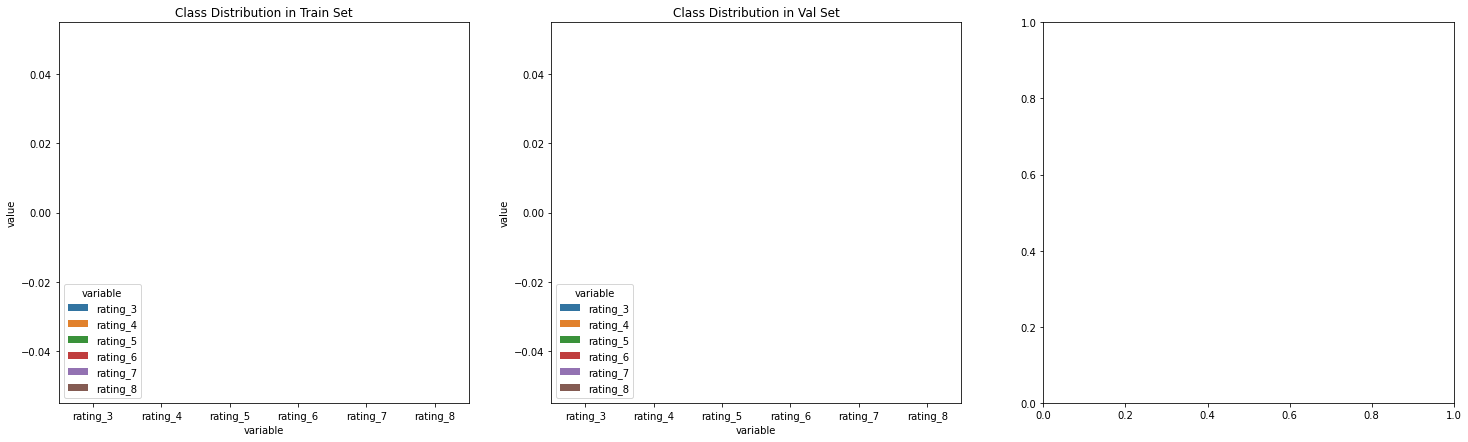

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
# Val
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')
# Test

In [ ]:
y_train, y_val, y_test = y_train.astype(float), y_val.astype(float), y_test.astype(float)

In [ ]:
class RegressionDataset(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())



In [ ]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.01
NUM_FEATURES = len(X.columns)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()

        self.layer_1 = nn.Linear(num_features, 32)
        self.layer_2 = nn.Linear(32, 64)
        self.layer_3 = nn.Linear(64, 32)
        self.layer_4 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)

        self.relu = nn.ReLU()
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.layer_out(x)
        return (x)
def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
model = MultipleRegression(NUM_FEATURES)
model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

MultipleRegression(
  (layer_1): Linear(in_features=12, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=32, bias=True)
  (layer_4): Linear(in_features=32, out_features=16, bias=True)
  (layer_out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_stats = {
    'train': [],
    "val": []
}

In [ ]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):

    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()

        y_train_pred = model(X_train_batch)

        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))

        train_loss.backward()
        optimizer.step()

        train_epoch_loss += train_loss.item()


    # VALIDATION
    with torch.no_grad():

        val_epoch_loss = 0

        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

            y_val_pred = model(X_val_batch)

            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))

            val_epoch_loss += val_loss.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))

    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')

Begin training.


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 6667499597.11605 | Val Loss: 1451020145.42935
Epoch 002: | Train Loss: 1164612778.53498 | Val Loss: 704737395.45015
Epoch 003: | Train Loss: 308937513.17695 | Val Loss: 189884047.94858
Epoch 004: | Train Loss: 196467831.65103 | Val Loss: 188637134.09781
Epoch 005: | Train Loss: 196045611.51276 | Val Loss: 188418397.67711
Epoch 006: | Train Loss: 195136621.05021 | Val Loss: 187285099.79833
Epoch 007: | Train Loss: 194757187.72181 | Val Loss: 187227391.63341
Epoch 008: | Train Loss: 194311888.90206 | Val Loss: 186556219.37642
Epoch 009: | Train Loss: 193959343.41399 | Val Loss: 186318985.93743
Epoch 010: | Train Loss: 193556241.62963 | Val Loss: 186626744.09408
Epoch 011: | Train Loss: 193299320.66996 | Val Loss: 187034493.92683
Epoch 012: | Train Loss: 193185921.88313 | Val Loss: 185803898.53543
Epoch 013: | Train Loss: 192723600.91440 | Val Loss: 185362387.07348
Epoch 014: | Train Loss: 192498039.07819 | Val Loss: 191096860.67474
Epoch 015: | Train Loss: 192483

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

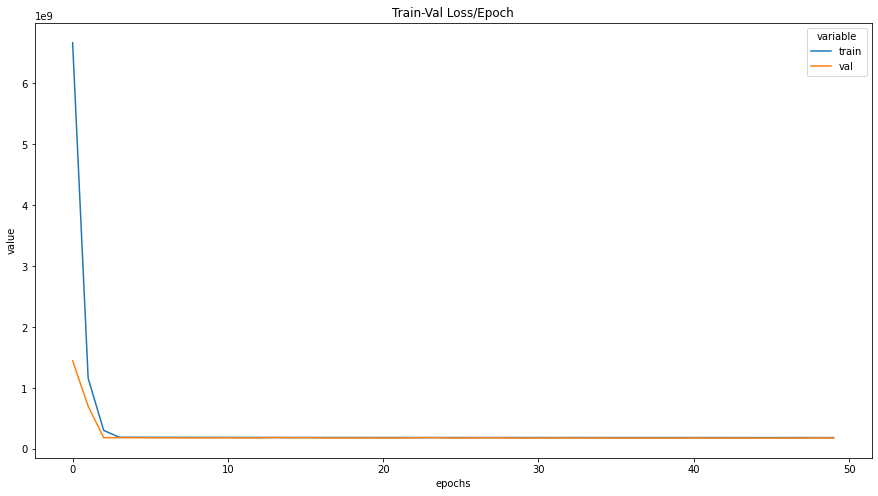

In [ ]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(15,8))
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    ctr = 0
    for X_batch, _ in test_loader:
        if ctr == 24298:
          break
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
        ctr += 1
    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_pred_list

[249927.953125,
 127187.984375,
 120404.7578125,
 195170.0,
 130426.171875,
 106372.1484375,
 97835.8515625,
 152408.140625,
 196309.609375,
 237145.234375,
 105245.7890625,
 175966.828125,
 114725.3125,
 153181.9375,
 225439.0625,
 113098.4765625,
 222746.359375,
 127451.0546875,
 233152.703125,
 161165.515625,
 165049.203125,
 81003.1953125,
 110562.0390625,
 114936.203125,
 135489.296875,
 95345.5703125,
 176982.640625,
 150445.453125,
 231446.84375,
 119540.484375,
 201554.6875,
 84108.34375,
 113230.6640625,
 116309.8203125,
 226062.296875,
 109456.0390625,
 110494.3984375,
 151570.546875,
 244157.8125,
 81335.484375,
 201788.234375,
 166809.9375,
 232821.46875,
 115589.9921875,
 130498.2109375,
 100864.9296875,
 139447.171875,
 136214.140625,
 95300.8359375,
 235654.40625,
 178165.6875,
 141535.953125,
 208269.953125,
 128849.09375,
 123919.2734375,
 121000.8203125,
 167886.578125,
 88062.2890625,
 89257.203125,
 137341.453125,
 114810.3046875,
 163101.703125,
 137855.765625,
 19

In [ ]:
mse = mean_absolute_error(y_test[:24298], y_pred_list)
r_square = r2_score(y_test[:24298], y_pred_list)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)
print(y_train[:10])
print(y_pred_list[:10])

Mean Squared Error : 6800.802401964748
R^2 : 0.9101114499545027
[138723.765625  171450.28125    83247.984375  127809.0625
 174751.078125  148529.0625    175267.         73729.8671875
 153977.0625     77014.015625 ]
[249927.953125, 127187.984375, 120404.7578125, 195170.0, 130426.171875, 106372.1484375, 97835.8515625, 152408.140625, 196309.609375, 237145.234375]


In [ ]:
difference = []


zip_object = zip(y_test[:24298], y_pred_list[:24298])
for list1_i, list2_i in zip_object:
    difference.append(abs(list1_i-list2_i))


sum(difference)/len(difference)

6490.319300699984